In [1]:
library(ggplot2)
library(dplyr)
library(reshape2)
theme_set(theme_bw())


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [2]:
d <- read.csv(file = "pab_immunized_percent_of_newborns.csv", header = TRUE, sep = ",")
head(d)

country,X1980,X1981,X1982,X1983,X1984,X1985,X1986,X1987,X1988,...,X2002,X2003,X2004,X2005,X2006,X2007,X2008,X2009,X2010,X2011
Afghanistan,NA,3,2,4,5,13,18,13,16,...,52,62,95,96,95,84,83,89,79,60
Albania,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,80,81,85,86,87,87,87,87,87,87
Algeria,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,66,66,69,69,70,70,71,71,90,90
Angola,NA,NA,NA,8,13,19,25,27,31,...,68,71,73,75,77,78,79,88,75,70
Bahamas,NA,NA,NA,NA,NA,NA,NA,61,65,...,87,88,89,90,92,90,90,90,90,92
Bahrain,5,36,25,31,34,34,18,13,28,...,94,91,97,97,93,96,99,94,94,94


In [3]:
# Remove NA rows and columns
d[ncol(d)] <- NULL
d <- d[!is.na(d[[1]]),]

Warning message:
"Removed 1 rows containing non-finite values (stat_bin)."

Saving 6.67 x 6.67 in image
Warning message:
"Removed 1 rows containing non-finite values (stat_bin)."

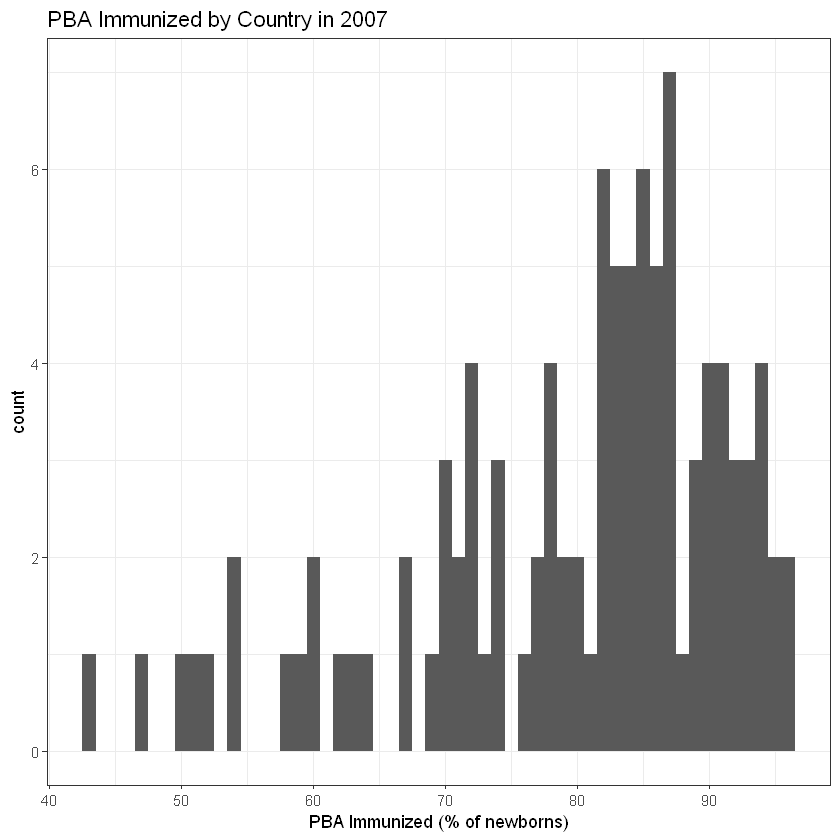

In [4]:
ggplot(d, aes(x=X2007)) + geom_histogram(binwidth=1) + xlab('PBA Immunized (% of newborns)') + ggtitle('PBA Immunized by Country in 2007')
ggsave('PBAHistogram.png')

Saving 6.67 x 6.67 in image


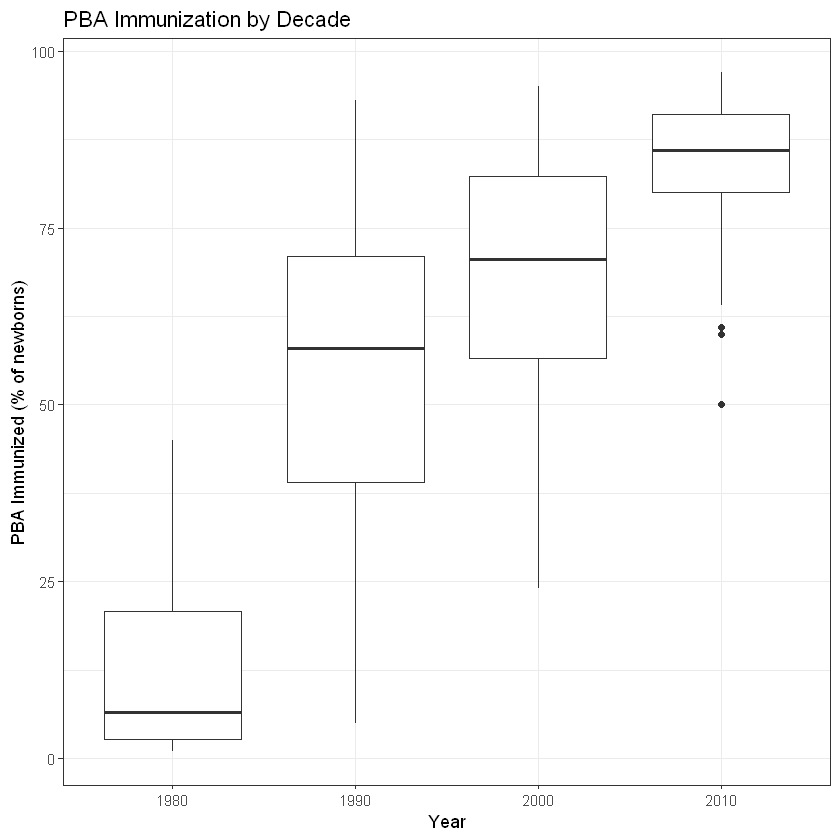

In [5]:
d2 <- melt(d, id.vars='country', measure.vars=c('X1980','X1990','X2000','X2010'), na.rm=TRUE, variable.name='year')
d2$year <- gsub('X','', d2$year)
ggplot(d2, aes(x=year, y=value)) + geom_boxplot() + xlab('Year') + ylab('PBA Immunized (% of newborns)') + ggtitle('PBA Immunization by Decade')
ggsave('PBABoxPlot.png')

In [7]:
head(d2)

,country,year,value
6,Bahrain,1980,5
7,Bangladesh,1980,2
20,Central African Republic,1980,8
22,Colombia,1980,3
28,Dominican Republic,1980,23
29,Ecuador,1980,2


In [8]:
mysample <- d2[sample(1:nrow(d2), 8, replace=FALSE),]
head(mysample)

,country,year,value
289,Somalia,2000,47
75,Papua New Guinea,1980,45
194,Tanzania,1990,77
338,Ecuador,2010,74
129,Cote d'Ivoire,1990,36
133,Egypt,1990,74


Saving 6.67 x 6.67 in image


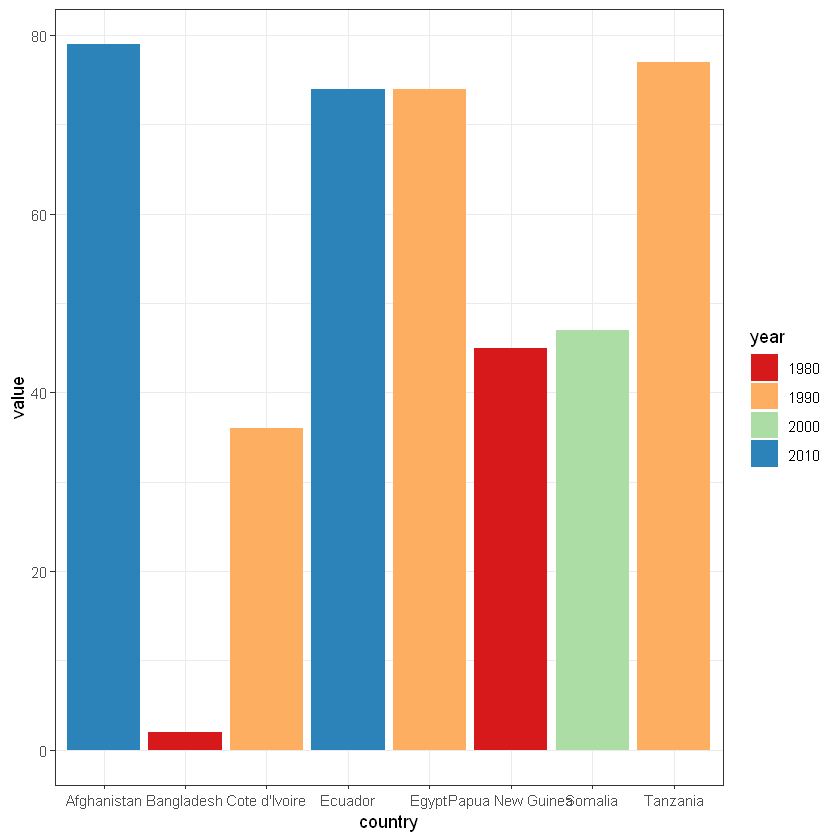

In [9]:
ggplot(mysample, aes(x=country, y=value, fill=year)) + geom_bar(stat="identity") + scale_fill_brewer(palette="Spectral")
ggsave('PBABarPlot.png')

Saving 6.67 x 6.67 in image


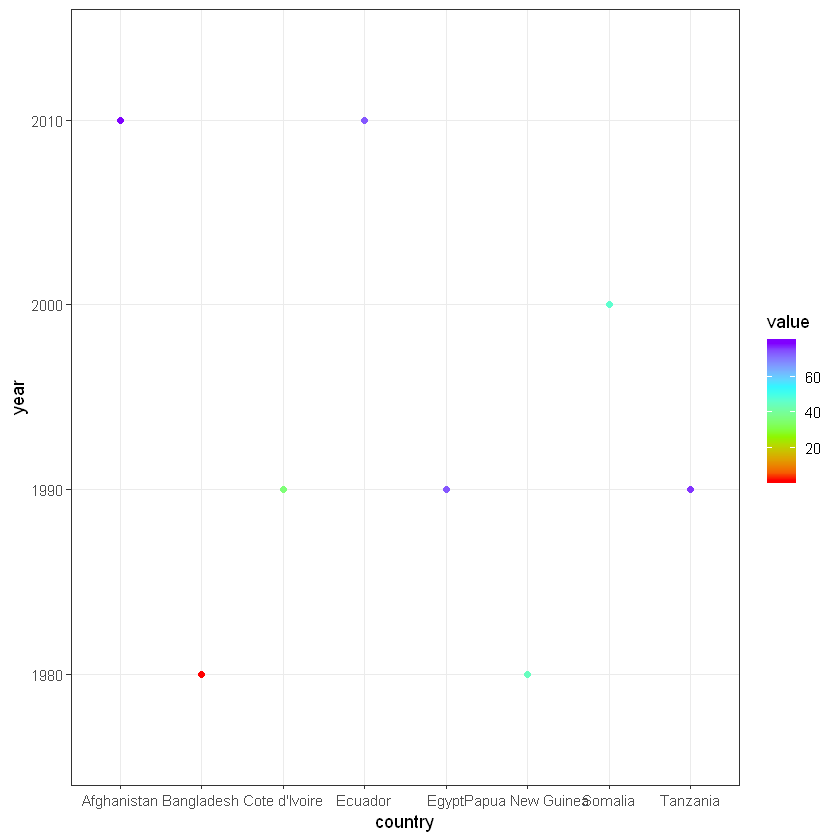

In [10]:
ggplot(mysample, aes(x=country, y=year, colour=value)) + geom_point() + scale_colour_gradientn(colours=rainbow(4))
ggsave('PBAPointPlot.png')

Saving 6.67 x 6.67 in image


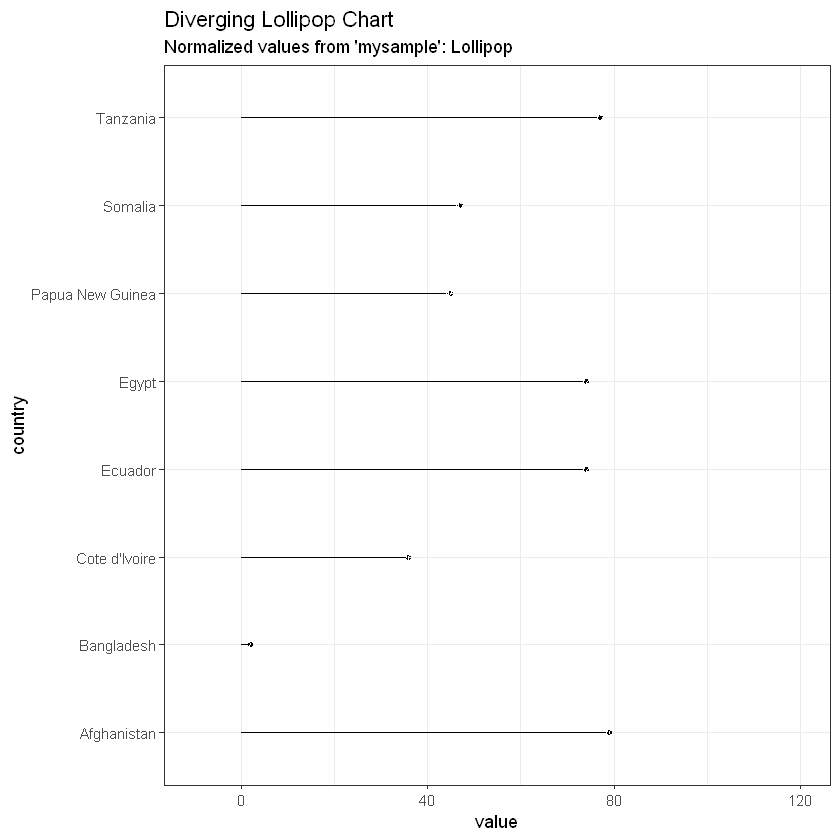

In [11]:
ggplot(mysample, aes(x=country, y=value, label=value)) + 
  geom_point(stat='identity', fill="black", size=1)  +
  geom_segment(aes(y = 0, 
                   x = country, 
                   yend = value, 
                   xend = country), 
               color = "black") +
  geom_text(color="white", size=2) +
  labs(title="Diverging Lollipop Chart", 
       subtitle="Normalized values from 'mysample': Lollipop") + 
  ylim(-10, 120) +
  coord_flip()
ggsave('PBALollipopPlot.png')